In [2]:
#import the data reader
from csv import reader

In [3]:
#read data from the data storage
#crime_data_lines is a RDD
crime_data_lines = sc.textFile('sf_data.csv')

In [7]:
details = crime_data_lines.map(lambda line: (line,100))
details.collect()[:5]

[('IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId',
  100),
 ('176178731,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,16:30,NORTHERN,NONE,FULTON ST / STEINER ST,-122.43322047529907,37.777489265262126,"(37.777489265262126, -122.43322047529907)",17617873106244',
  100),
 ('176178725,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,04:23,NORTHERN,NONE,3200 Block of DIVISADERO ST,-122.44268055058104,37.79950711501787,"(37.79950711501787, -122.44268055058104)",17617872506244',
  100),
 ('176178634,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Tuesday,07/11/2017,00:04,NORTHERN,NONE,1500 Block of GREENWICH ST,-122.42518476656386,37.800254402551815,"(37.800254402551815, -122.42518476656386)",17617863406224',
  100),
 ('170850874,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Tuesday,07/11/2017,12:00,BAYVIEW,NONE,17TH ST / VERMONT ST,-122.40449925232595,37.76466445995542,"(37.76466445995542, -122.40449925232595)",170850874

In [9]:
#prepare data 
#one line is one crime record, strip " for every word, and put into []
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])

In [11]:
df_crimes.collect()[:2]

[['IncidntNum',
  'Category',
  'Descript',
  'DayOfWeek',
  'Date',
  'Time',
  'PdDistrict',
  'Resolution',
  'Address',
  'X',
  'Y',
  'Location',
  'PdId'],
 ['176178731',
  'LARCENY/THEFT',
  'GRAND THEFT FROM LOCKED AUTO',
  'Tuesday',
  '07/11/2017',
  '16:30',
  'NORTHERN',
  'NONE',
  'FULTON ST / STEINER ST',
  '-122.43322047529907',
  '37.777489265262126',
  '(37.777489265262126, -122.43322047529907)',
  '17617873106244']]

In [12]:
#get header
header = df_crimes.first()

In [13]:
header

['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

In [14]:
#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

In [15]:
#get the first line of data
crimes.take(1)

[['176178731',
  'LARCENY/THEFT',
  'GRAND THEFT FROM LOCKED AUTO',
  'Tuesday',
  '07/11/2017',
  '16:30',
  'NORTHERN',
  'NONE',
  'FULTON ST / STEINER ST',
  '-122.43322047529907',
  '37.777489265262126',
  '(37.777489265262126, -122.43322047529907)',
  '17617873106244']]

In [16]:
# First question: Write a Spark program that counts the number of crimes for different category.

#method1,use rdd
catorgory_set_rdd = crimes.map(lambda item: (item[1],1))
from operator import add
sorted(catorgory_set_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])


[('LARCENY/THEFT', 2805),
 ('OTHER OFFENSES', 1002),
 ('NON-CRIMINAL', 991),
 ('ASSAULT', 780),
 ('VANDALISM', 650),
 ('VEHICLE THEFT', 353),
 ('SUSPICIOUS OCC', 312),
 ('WARRANTS', 312),
 ('BURGLARY', 302),
 ('MISSING PERSON', 265),
 ('ROBBERY', 187),
 ('DRUG/NARCOTIC', 167),
 ('FRAUD', 155),
 ('SECONDARY CODES', 118),
 ('TRESPASS', 109),
 ('WEAPON LAWS', 106),
 ('STOLEN PROPERTY', 66),
 ('RECOVERED VEHICLE', 48),
 ('SEX OFFENSES, FORCIBLE', 40),
 ('RUNAWAY', 39),
 ('FORGERY/COUNTERFEITING', 29),
 ('ARSON', 29),
 ('PROSTITUTION', 20),
 ('DRUNKENNESS', 19),
 ('DISORDERLY CONDUCT', 18),
 ('DRIVING UNDER THE INFLUENCE', 16),
 ('KIDNAPPING', 10),
 ('BRIBERY', 7),
 ('EMBEZZLEMENT', 5),
 ('LOITERING', 4),
 ('LIQUOR LAWS', 4),
 ('SUICIDE', 3),
 ('EXTORTION', 2),
 ('PORNOGRAPHY/OBSCENE MAT', 1),
 ('SEX OFFENSES, NON FORCIBLE', 1),
 ('FAMILY OFFENSES', 1),
 ('TREA', 1)]

In [17]:
#method2, use dataframe

from pyspark.sql import Row

crime_dict = crimes.map(lambda item:Row(IncidntNum=item[0],Category=item[1],Descript=item[2],DayOfWeek=item[3],Date=item[4],Time=item[5],PdDistrict=item[6],Resolution=item[7],Address=item[8],X = item[9], Y = item[10], Location=item[11],PdId=item[12]))

In [18]:
crime_df = spark.createDataFrame(crime_dict)#create dataframe
crime_df_category = crime_df.select(crime_df['Category'])
crime_df_category_map = crime_df_category.rdd.map(lambda item: (item,1))
sorted(crime_df_category_map.reduceByKey(add).collect(), key = lambda item: -item[1])

[(Row(Category='LARCENY/THEFT'), 2805),
 (Row(Category='OTHER OFFENSES'), 1002),
 (Row(Category='NON-CRIMINAL'), 991),
 (Row(Category='ASSAULT'), 780),
 (Row(Category='VANDALISM'), 650),
 (Row(Category='VEHICLE THEFT'), 353),
 (Row(Category='SUSPICIOUS OCC'), 312),
 (Row(Category='WARRANTS'), 312),
 (Row(Category='BURGLARY'), 302),
 (Row(Category='MISSING PERSON'), 265),
 (Row(Category='ROBBERY'), 187),
 (Row(Category='DRUG/NARCOTIC'), 167),
 (Row(Category='FRAUD'), 155),
 (Row(Category='SECONDARY CODES'), 118),
 (Row(Category='TRESPASS'), 109),
 (Row(Category='WEAPON LAWS'), 106),
 (Row(Category='STOLEN PROPERTY'), 66),
 (Row(Category='RECOVERED VEHICLE'), 48),
 (Row(Category='SEX OFFENSES, FORCIBLE'), 40),
 (Row(Category='RUNAWAY'), 39),
 (Row(Category='ARSON'), 29),
 (Row(Category='FORGERY/COUNTERFEITING'), 29),
 (Row(Category='PROSTITUTION'), 20),
 (Row(Category='DRUNKENNESS'), 19),
 (Row(Category='DISORDERLY CONDUCT'), 18),
 (Row(Category='DRIVING UNDER THE INFLUENCE'), 16),
 (Row

In [19]:
#method3, use sql

crime_df.createOrReplaceTempView("crime_dict")
crime_df_categorySet = spark.sql("SELECT COUNT(*) AS Num, Category FROM crime_dict group by Category ORDER BY COUNT(*) DESC")
crime_df_categorySet.show()

+----+--------------------+
| Num|            Category|
+----+--------------------+
|2805|       LARCENY/THEFT|
|1002|      OTHER OFFENSES|
| 991|        NON-CRIMINAL|
| 780|             ASSAULT|
| 650|           VANDALISM|
| 353|       VEHICLE THEFT|
| 312|            WARRANTS|
| 312|      SUSPICIOUS OCC|
| 302|            BURGLARY|
| 265|      MISSING PERSON|
| 187|             ROBBERY|
| 167|       DRUG/NARCOTIC|
| 155|               FRAUD|
| 118|     SECONDARY CODES|
| 109|            TRESPASS|
| 106|         WEAPON LAWS|
|  66|     STOLEN PROPERTY|
|  48|   RECOVERED VEHICLE|
|  40|SEX OFFENSES, FOR...|
|  39|             RUNAWAY|
+----+--------------------+
only showing top 20 rows



In [20]:
# Second question: Write a Spark program that counts the number of crimes for different district.

#method1,use rdd
district_set_rdd = crimes.map(lambda item: (item[6],1))
from operator import add
sorted(district_set_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])

[('SOUTHERN', 1745),
 ('MISSION', 1191),
 ('NORTHERN', 1173),
 ('CENTRAL', 1137),
 ('BAYVIEW', 817),
 ('INGLESIDE', 670),
 ('TARAVAL', 662),
 ('TENDERLOIN', 536),
 ('RICHMOND', 527),
 ('PARK', 519)]

In [21]:
#method2, use dataframe

crime_df_district = crime_df.select(crime_df['PdDistrict'])
crime_df_district_map = crime_df_district.rdd.map(lambda item: (item,1))
sorted(crime_df_district_map.reduceByKey(add).collect(), key = lambda item: -item[1])

[(Row(PdDistrict='SOUTHERN'), 1745),
 (Row(PdDistrict='MISSION'), 1191),
 (Row(PdDistrict='NORTHERN'), 1173),
 (Row(PdDistrict='CENTRAL'), 1137),
 (Row(PdDistrict='BAYVIEW'), 817),
 (Row(PdDistrict='INGLESIDE'), 670),
 (Row(PdDistrict='TARAVAL'), 662),
 (Row(PdDistrict='TENDERLOIN'), 536),
 (Row(PdDistrict='RICHMOND'), 527),
 (Row(PdDistrict='PARK'), 519)]

In [22]:
#method3, use sql

crime_df_districtSet = spark.sql("SELECT COUNT(*) AS Num, PdDistrict FROM crime_dict group by PdDistrict ORDER BY COUNT(*) DESC")
crime_df_districtSet.show()

+----+----------+
| Num|PdDistrict|
+----+----------+
|1745|  SOUTHERN|
|1191|   MISSION|
|1173|  NORTHERN|
|1137|   CENTRAL|
| 817|   BAYVIEW|
| 670| INGLESIDE|
| 662|   TARAVAL|
| 536|TENDERLOIN|
| 527|  RICHMOND|
| 519|      PARK|
+----+----------+



In [23]:
# Third question: Write a Spark program that counts the number of crimes each Sunday at Downtown SF.
# Longitude of San Francisco: -122.419416，Latitude of San Francisco: 37.774929，define the Downtown SF as 0.005 degree error from this Longtitude and Latitude

#method1, use sql

#pay attention to the first()
crime_df_eachSunday_downtown = spark.sql("SELECT COUNT(*) AS Num, first(DayOfWeek) As DayOfWeek, Date FROM crime_dict\
                                          WHERE DayOfWeek = 'Sunday' AND -122.414416>crime_dict.X AND crime_dict.X>-122.424416\
                                          AND 37.769929<crime_dict.Y AND 37.779929>crime_dict.Y\
                                          group by Date ORDER BY COUNT(*) DESC")
                                          
crime_df_eachSunday_downtown.show()                                   


+---+---------+----------+
|Num|DayOfWeek|      Date|
+---+---------+----------+
| 16|   Sunday|07/30/2017|
| 12|   Sunday|07/16/2017|
|  9|   Sunday|07/23/2017|
+---+---------+----------+



In [24]:
#method2, use rdd

crimes_Sunday_downtown_rdd = crimes.filter(lambda x: x[3]=='Sunday' and float(x[9])<-122.414416 and float(x[9])>-122.424416\
                                          and float(x[10])>37.769929 and float(x[10])<37.779929)
crimes_Sunday_downtown_groupByDate = crimes_Sunday_downtown_rdd.map(lambda x: (x[4],1))
sorted(crimes_Sunday_downtown_groupByDate.reduceByKey(add).collect(), key = lambda item: -item[1])


[('07/30/2017', 16), ('07/16/2017', 12), ('07/23/2017', 9)]

In [25]:
#method3, use dataframe

crime_df_timeAndPlace = crime_df.select(crime_df['DayOfWeek'], crime_df['Date'],crime_df['X'],crime_df['Y'])
crime_df_timeAndPlace_filt =crime_df_timeAndPlace.rdd.filter(lambda x: x[0]=='Sunday' and float(x[2])<-122.414416 and float(x[2])>-122.424416\
                                          and float(x[3])>37.769929 and float(x[3])<37.779929) 
crime_df_groupByDate = crime_df_timeAndPlace_filt.map(lambda x: (x[1],1))
sorted(crime_df_groupByDate.reduceByKey(add).collect(), key = lambda item: -item[1])

[('07/30/2017', 16), ('07/16/2017', 12), ('07/23/2017', 9)]

# Forth question: 
visualize the spatial distribution of crimes and run a kmeans clustering algorithm

In [26]:
# Forth question: visualize the spatial distribution of crimes and run a kmeans clustering algorithm

#data preprocessing

crimes_place_rdd = crimes.map(lambda x: x[11])
crimes_place_rdd.collect()[:5]

['(37.777489265262126, -122.43322047529907)',
 '(37.79950711501787, -122.44268055058104)',
 '(37.800254402551815, -122.42518476656386)',
 '(37.76466445995542, -122.40449925232595)',
 '(37.786259904319635, -122.41313571574284)']

In [27]:
#define a combine X and Y function
def addY(item):
  res = km.predict(item)
  item = np.append(item,res)
  return item

In [28]:
from pyspark.mllib.clustering import KMeans
from pyspark.mllib.feature import StandardScaler
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

k_clusters = 5
crime_df_location = crime_df.select(crime_df['X'],crime_df['Y'])#dataframe
crime_df_location_array = crime_df_location.toPandas().values#df to array
crime_df_location_rdd = sc.parallelize(crime_df_location_array)#array to rdd
km = KMeans.train(crime_df_location_rdd, k=k_clusters , maxIterations=50, initializationMode="random", initializationSteps=5, epsilon=1e-4)
crime_df_location_computeCost = km.computeCost(sc.parallelize(crime_df_location_array))
crime_df_location_center = km.clusterCenters
Y = crime_df_location_rdd.map(lambda x: km.predict(x))
X_Y = crime_df_location_rdd.map(addY)

In [33]:
#Analyze cluster center

crime_df_location = crime_df.select(crime_df['X'],crime_df['Y'],crime_df['PdDistrict'])
crime_df_location.collect()
cluster_names = {}
unique_labels = set()
for i in range(k_clusters):
  unique_labels.add(i)

for k in unique_labels:
    k_element=X_Y.filter(lambda x: x[2]==k)
    k_element_sql = k_element.map(lambda item:Row(X=item[0],Y=item[1],Cluster=item[2]))
    k_element_sql_df = spark.createDataFrame(k_element_sql)
    k_element_sql_df.createOrReplaceTempView("k_element_sql_df")
    k_XY_District = spark.sql("SELECT crime_dict.PdDistrict AS District,COUNT(crime_dict.PdDistrict) AS Num\
    FROM crime_dict, k_element_sql_df\
    WHERE crime_dict.X=k_element_sql_df.X AND crime_dict.Y=k_element_sql_df.Y\
    group by crime_dict.PdDistrict")
    print ("Cluster"+" "+str(k))
    k_XY_District.show()
    
    k_XY_District.createOrReplaceTempView("k_XY_District")
    k_XY_District_higher1000 = spark.sql("SELECT k_XY_District.District AS Main_District\
    FROM k_XY_District WHERE Num>1000")
    k_XY_District_higher1000.show()
    cluster_names[k]=""
    k_XY_District_higher1000_array = k_XY_District_higher1000.toPandas().values#df to array
    for i in range(len(k_XY_District_higher1000_array)-1):
        cluster_names[k] +=str(k_XY_District_higher1000_array[i][0])+','
    cluster_names[k]+=str(k_XY_District_higher1000_array[len(k_XY_District_higher1000_array)-1][0])
    
print (cluster_names)

#According to the result, we can conclude that for each cluster, their main district is as below:

Cluster 0
+---------+----+
| District| Num|
+---------+----+
|  MISSION|8031|
|  BAYVIEW|  20|
|  TARAVAL|   1|
|INGLESIDE|1125|
|     PARK|  85|
| SOUTHERN|  51|
| NORTHERN|  65|
+---------+----+

+-------------+
|Main_District|
+-------------+
|      MISSION|
|    INGLESIDE|
+-------------+

Cluster 1
+----------+-----+
|  District|  Num|
+----------+-----+
|   MISSION|  116|
|   BAYVIEW|  329|
|   CENTRAL| 4489|
|TENDERLOIN| 5155|
|      PARK|    5|
|  SOUTHERN|96495|
|  RICHMOND|    1|
|  NORTHERN| 2349|
+----------+-----+

+-------------+
|Main_District|
+-------------+
|      CENTRAL|
|   TENDERLOIN|
|     SOUTHERN|
|     NORTHERN|
+-------------+

Cluster 2
+---------+----+
| District| Num|
+---------+----+
|  MISSION|  12|
|  BAYVIEW|2401|
|INGLESIDE| 680|
+---------+----+

+-------------+
|Main_District|
+-------------+
|      BAYVIEW|
+-------------+

Cluster 3
+---------+-----+
| District|  Num|
+---------+-----+
|  BAYVIEW|    4|
|  TARAVAL|11493|
|INGLESIDE|  179|
|     PA

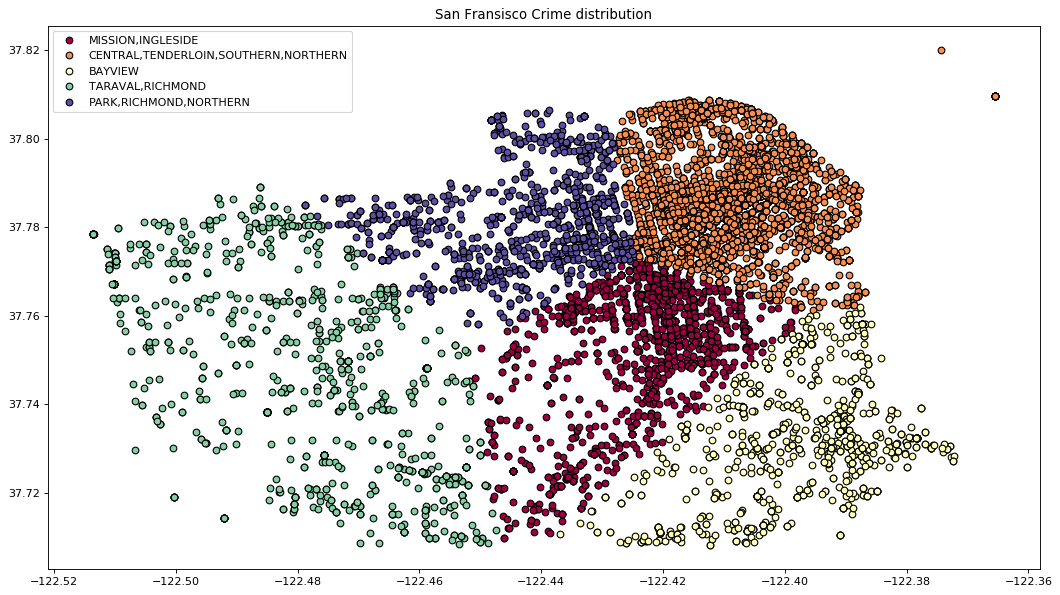

In [34]:
%matplotlib inline 

colors=plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

plt.figure(figsize=(16, 9), dpi=80)
ax = plt.subplot(111)
def draw(item,col,k):
    ax.plot(float(item[0][0]), float(item[0][1]), 'o', color=col, markeredgecolor="k",label=cluster_names[k],
                 markersize=6)
    for i in range(1,len(item)):
        ax.plot(float(item[i][0]), float(item[i][1]), 'o', color=col, markeredgecolor="k",
                 markersize=6)
for k,col in zip(unique_labels,colors):
    k_element=X_Y.filter(lambda x: x[2]==k)
    k_element_draw = k_element.collect()
    draw(k_element_draw,col,k)

plt.title('San Fransisco Crime distribution')
ax.legend(numpoints=1, loc = 2)
plt.show()

# Analysis of Southern District's crime on one day

In [28]:
crime_df_Date_Time_District = crime_df.select(crime_df['Time'],crime_df['PdDistrict'],crime_df['Date'])#dataframe
crime_Southern = crime_df_Date_Time_District.rdd.filter(lambda x: x[1]=='SOUTHERN')
def pick_time_hour(item):
    item=int(item[0].split(':')[0])+float(item[0].split(':')[1])/60
    return item
crime_Southern_Time = crime_Southern.map(pick_time_hour).collect()

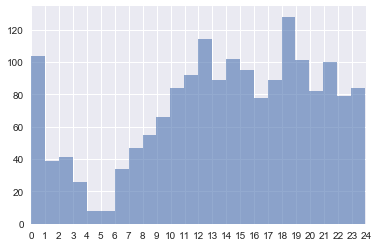

In [29]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb

fig_oneDay = plt.figure()
plt.hist(crime_Southern_Time, bins = 24,alpha = 0.6)
plt.xlim((0.0,24))
plt.xticks(np.arange(0,25))
plt.show()